## Business Understanding 

**Business Understanding: Microsoft's Exploration of Movie-Making**

*Introduction:*
Microsoft, a technology giant renowned for its innovation and influence, is contemplating entry into the movie-making industry. The rationale behind this exploration is rooted in the potential profitability of the film sector. This initiative seeks to unravel the dynamics of the movie business, answering crucial questions about revenue, genre preferences, duration impact, budget considerations, studio affiliations, and the influence of key personnel like directors, writers, and actors.

*Project Objectives:*
The primary objectives of this data science project are:
1. **Revenue Analysis:** Understand the financial landscape of the movie industry by analyzing the profitability of films.
2. **Success Factors Identification:** Identify critical elements contributing to a movie's success, encompassing genre, duration, budget, studio associations, and the impact of key individuals.
3. **Risk-Return Evaluation:** Assess the return on investment (ROI) to guide Microsoft's decision-making, balancing financial gains with potential brand impact.
4. **Strategic Insights:** Provide actionable insights to assist Microsoft in strategically allocating resources to movie production, considering financial returns and brand image.

*Approach:*
The approach involves leveraging historical movie data to:
1. Analyze the financial performance of movies for revenue insights.
2. Investigate success factors, including genre preferences and the correlation between duration, budget, and profitability.
3. Evaluate risk and return, considering both financial and brand implications.
4. Deliver strategic recommendations aligning with Microsoft's overarching business goals.

*Expected Outcomes:*
This project aims to furnish Microsoft with a comprehensive understanding of the movie industry, ensuring that the company can make well-informed decisions. By examining the industry's financial landscape, identifying success factors, and evaluating the risk-return profile, Microsoft can navigate the complexities of movie-making while safeguarding its esteemed brand image.

*Key Deliverables:*
1. Revenue analysis report detailing the financial landscape of the movie industry.
2. Identification of key success factors, providing insights into genre preferences, duration impact, and budget considerations.
3. ROI analysis to guide Microsoft's strategic decision-making regarding potential investments in movie production.
4. Recommendations based on a balanced consideration of financial returns and brand impact.


## Data Understanding 

In [47]:
#Importing all libraries required for the project 
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from scipy.stats import norm
%matplotlib inline
     

In [2]:
#Loading the data 
bom_movie_details = pd.read_csv('bom.movie_gross.csv')


In [4]:
#Displaying the first 5 rows of the data
bom_movie_details.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#Displaying details of the last five rows of the data
bom_movie_details.tail()


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [6]:
#Get info on the data
bom_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This presents dataframe containing different data types e.g studio, title, and also the column categories e.g. Dtype, #.

In [7]:
# Show the summary statistics of the data
bom_movie_details.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In this dataset, a column for domestic gross was created leaving out foreign gross. From the data frame coded through cell 6 (bom_movie_details.info), Foreign gross appears as a object data type. This data set also helps us establish the central tendency.

In [9]:
# Establishing connection to the sql database and checking the available tables
conn = sqlite3.connect('im.db')
pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';
""",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


A connnection to the SQL database with imdb data is established. 

In [10]:
#previewing the first five five rows of the dataset
im_movie_basics = pd.read_sql("""
                              SELECT*
                              FROM movie_basics;
                              """,conn)
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


The preview created illustrates different movie titles based on their genres, movie durations and their starting year.

In [11]:
#Get info on the data
im_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [12]:
# Show the summary statistics of the data
im_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


The summary indicates the central tendency of the movie durations (runtime) and the start year.

In [13]:
#connecting to the sql database with imdb ratings and reading the first 5 rows
im_movie_ratings = pd.read_sql("""
                              SELECT*
                              FROM movie_ratings;
                              """,conn)
im_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Based on each movie id, they each received an average rating in relation to the total number of votes

In [14]:
#Get info on the data
im_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
# Show the summary statistics of the data
im_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


This summmary indicates the central tendency on the average rating and number of votes for a movie.

In [16]:
#Displaying data details of the first five rows
movie_budgets= pd.read_csv("tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Illustration of the first five movies' budgets.

In [17]:
#Displaying details of the last five rows of the data
movie_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


Illustration of the last five movie budgets. Based on the production budgets string (Decrease).

In [18]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


## Data Preparation

In [20]:
#Data preparation, turn movie budgets data to int
movie_budgets['production_budget']= movie_budgets['production_budget'].str.replace("$",'')
movie_budgets['domestic_gross']= movie_budgets['domestic_gross'].str.replace("$",'')
movie_budgets['worldwide_gross']= movie_budgets['worldwide_gross'].str.replace("$",'')

movie_budgets['production_budget']=movie_budgets['production_budget'].str.replace(',','')
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].str.replace(',','')
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].str.replace(',','')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


For the Production budget, domestic gross and worldwide strings, the '$' is ommitted

In [21]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [22]:
#integers
movie_budgets['production_budget']=movie_budgets['production_budget'].astype(int)
movie_budgets['domestic_gross']=movie_budgets['domestic_gross'].astype(int)
movie_budgets['id']=movie_budgets['id'].astype(str)
movie_budgets['worldwide_gross']=movie_budgets['worldwide_gross'].astype(np.int64)

The strings are converted into integers

In [23]:
#check if values have been converted to int
#chack if ID has been converted to str  
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   object
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


In [24]:
#Calculating and forming the columns for total_gross,net_return,return_on_investment
movie_budgets['total_gross']=movie_budgets['domestic_gross']+movie_budgets['worldwide_gross']
movie_budgets['net_return']=movie_budgets['total_gross']-movie_budgets['production_budget']
movie_budgets['return_on_investment']=movie_budgets['net_return']/movie_budgets['production_budget']*100
     

In [25]:
# checking for null values
bom_movie_details.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

On conversion of numerical columns to int., the domestic gross and foreign gross each have high null values which need to be lowered.

In [26]:
bom_movie_details= bom_movie_details.dropna()
bom_movie_details.shape
bom_movie_details

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [27]:
# checking for unique values
bom_movie_details.nunique()

title             2007
studio             172
domestic_gross    1295
foreign_gross     1193
year                 9
dtype: int64

In [28]:
# checking for null values
movie_budgets.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
total_gross             0
net_return              0
return_on_investment    0
dtype: int64

This columns can be used as a result of absence of null values.

In [29]:
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_return,return_on_investment
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,511.010451
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445,877.115505
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,808.983227
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,1272840850,972840850,324.280283
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,194.989835
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,259.898366


This illustration shows how much movies were able to make back incurring either profits or losses, shown through the ROI (return on investment)

In [30]:
bom_movie_details.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
# checking for unique values
movie_budgets.nunique()

id                       100
release_date            2418
movie                   5698
production_budget        509
domestic_gross          5164
worldwide_gross         5356
total_gross             5363
net_return              5497
return_on_investment    5402
dtype: int64

In [32]:
#checking for duplicates
len(movie_budgets[movie_budgets.duplicated()])

0

In [33]:
#Check for null values in imdb movie ratings
im_movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Neither duplicates nor null values were recognised in both cell 32 and 33 respectively

In [34]:
#Checking for number of unique values in every column
im_movie_ratings.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

In [35]:
im_movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Both runtime minutes and Genres contain really high null values which have to be dropped.

In [36]:
im_movie_basics= im_movie_basics.dropna()
im_movie_basics.shape
im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [37]:
im_movie_basics.nunique()

movie_id           112232
primary_title      105478
original_title     106905
start_year             13
runtime_minutes       361
genres               1040
dtype: int64

In [38]:
#Checking for the total number of movies per genre 
genre_analysis= im_movie_basics['genres'].value_counts().head(10)
genre_analysis

genres
Documentary              24672
Drama                    15725
Comedy                    6413
Comedy,Drama              3163
Horror                    2975
Biography,Documentary     2052
Thriller                  1924
Drama,Romance             1806
Documentary,Drama         1515
Comedy,Drama,Romance      1451
Name: count, dtype: int64

In [52]:
genre_analysis.head()

genres
Documentary     24672
Drama           15725
Comedy           6413
Comedy,Drama     3163
Horror           2975
Name: count, dtype: int64

Illustrations of different movie genres and number of movies in each category

## Exploratory Data Analysis 

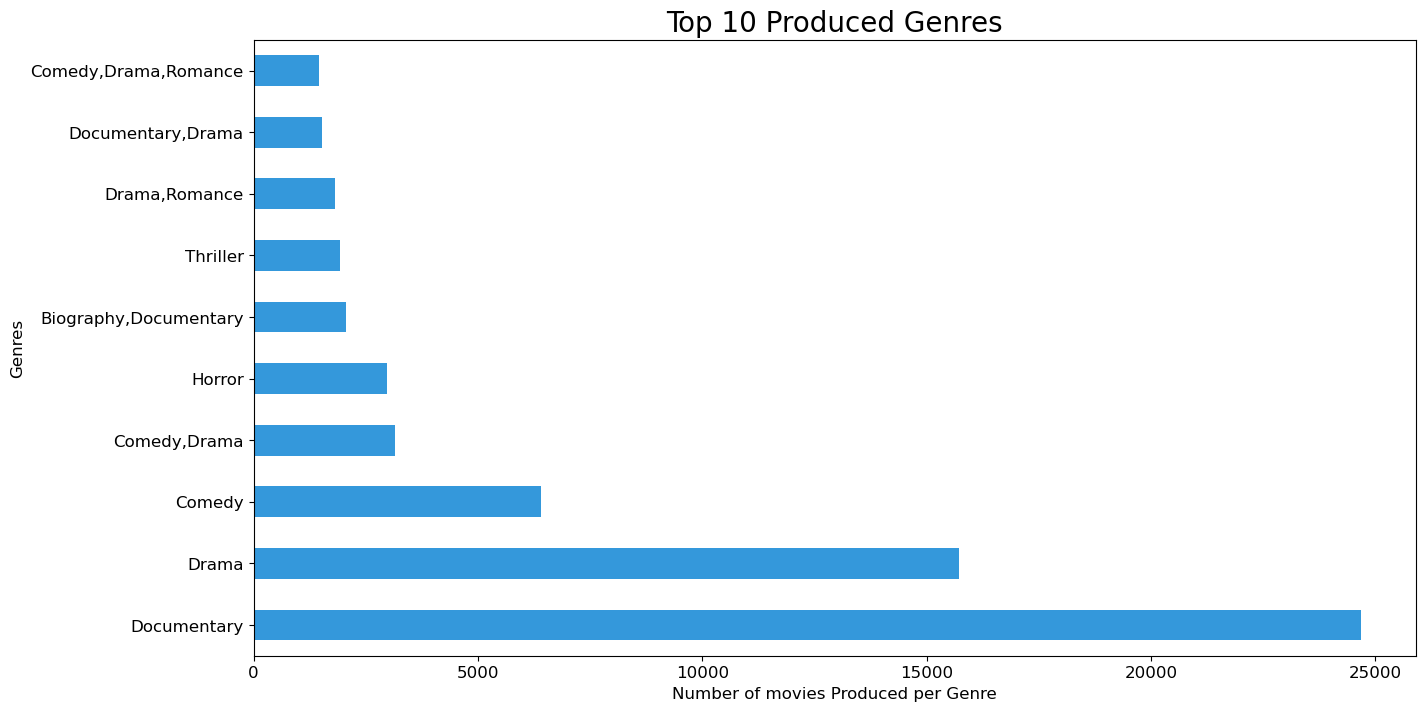

In [54]:
#Creating a bar graph of the top produced movie genres
ax = genre_analysis.plot(kind = 'barh', figsize = (15,8), color = '#3498db', fontsize = 12)
ax.set_alpha(0.5)
ax.set_title('Top 10 Produced Genres', fontsize = 20)
ax.set_ylabel('Genres', fontsize = 12)
ax.set_xlabel('Number of movies Produced per Genre', fontsize = 12)
plt.show()

This establishes a more visual movie genre classification through the bar graph plot of the movie genres against the number of movies with documentaries having the highest no. of movies

In [40]:
#Joining the movie_basic table with the movie_rating table
im_movie_basic_rating =pd.read_sql("""
                                   SELECT *
                                    FROM movie_basics
                                    JOIN movie_ratings
                                    USING (movie_id);
                                    """,conn)
im_movie_basic_rating

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


this helps us establish the ratings for each genre

In [41]:
#checking ratings per genre and sorting them in descending order
genre_ratings = im_movie_basic_rating.groupby(['genres'])['averagerating'].mean().sort_values(ascending = False).head()
genre_ratings

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
Name: averagerating, dtype: float64

a representation of genres with the highest ratings i.e comedy, documentary, fantasy to the least rated i.e. game shows

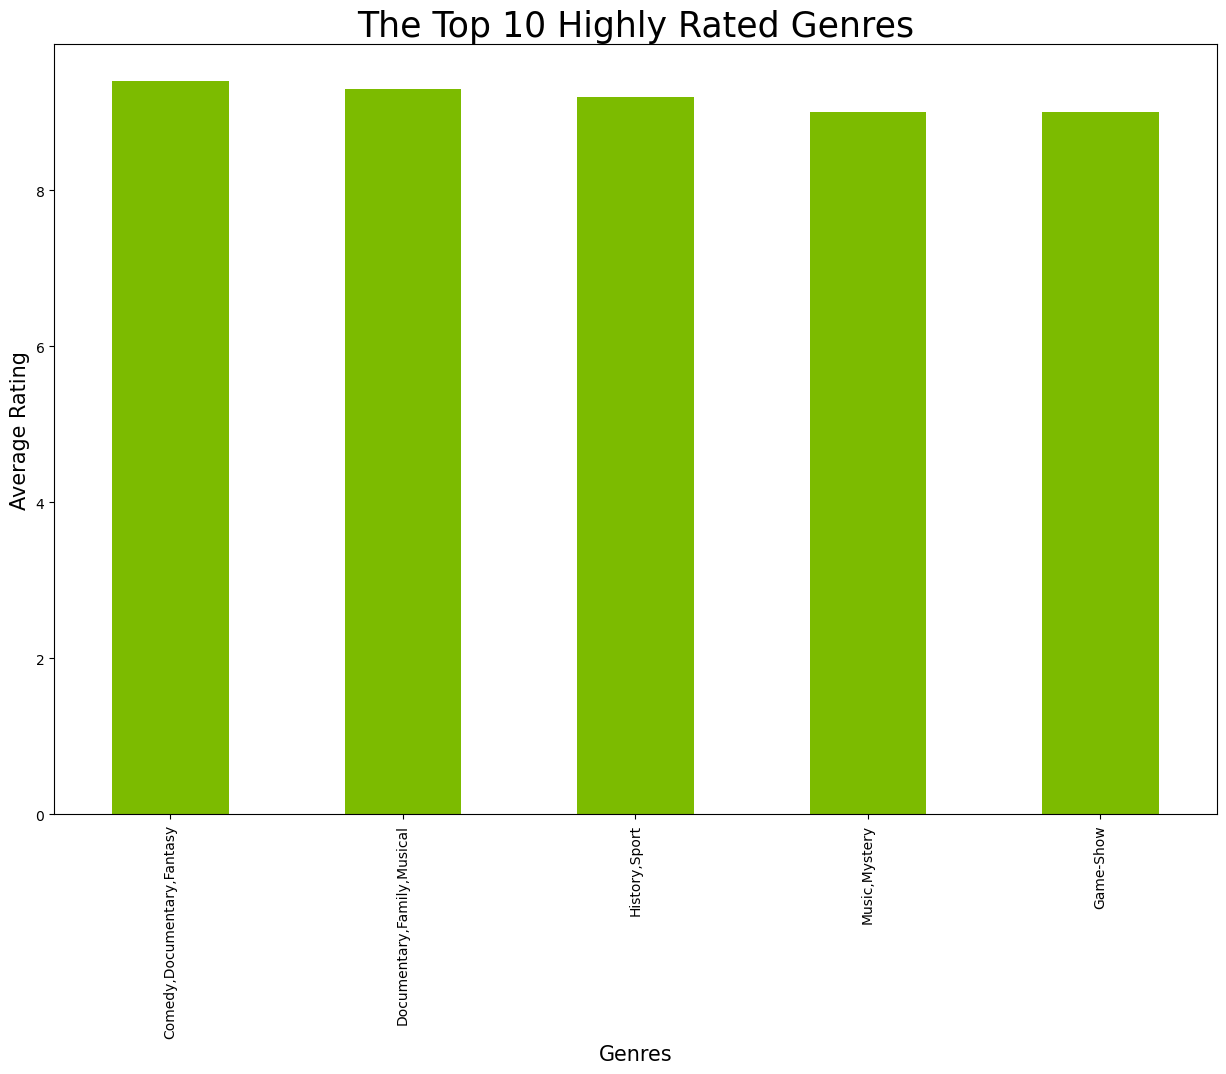

In [55]:
#Creating a graph of the top rated genres
ax = genre_ratings.plot( kind = 'bar', color = '#7cbb00',figsize = (15,10))
ax.set_title ('The Top 10 Highly Rated Genres', fontsize = 25)
ax.set_ylabel('Average Rating',fontsize = 15)
ax.set_xlabel('Genres', fontsize = 15)
plt.show()

In [43]:
#Converting the column foreign gross to float datatype
bom_movie_details['foreign_gross'] = bom_movie_details['foreign_gross'].str.replace(',','').astype(float)

#Adding foreign gross and domestic gross to get total gross
bom_movie_details['total_gross'] = bom_movie_details['domestic_gross'] + bom_movie_details['foreign_gross']

The foreign gross column is changed from being an object data type to resemble the domestic gross data type

In [44]:
#Arranging the data of total gross for every studio in descending order 
studio_gross =bom_movie_details.groupby('studio')['total_gross'].mean().sort_values(ascending = False).head()
studio_gross

studio
HC          8.703000e+08
P/DW        5.076500e+08
BV          4.249075e+08
GrtIndia    2.542000e+08
WB          2.368577e+08
Name: total_gross, dtype: float64

this is a ranking in descending order of gross earnings respective to the studios.

Text(0, 0.5, 'Total Gross')

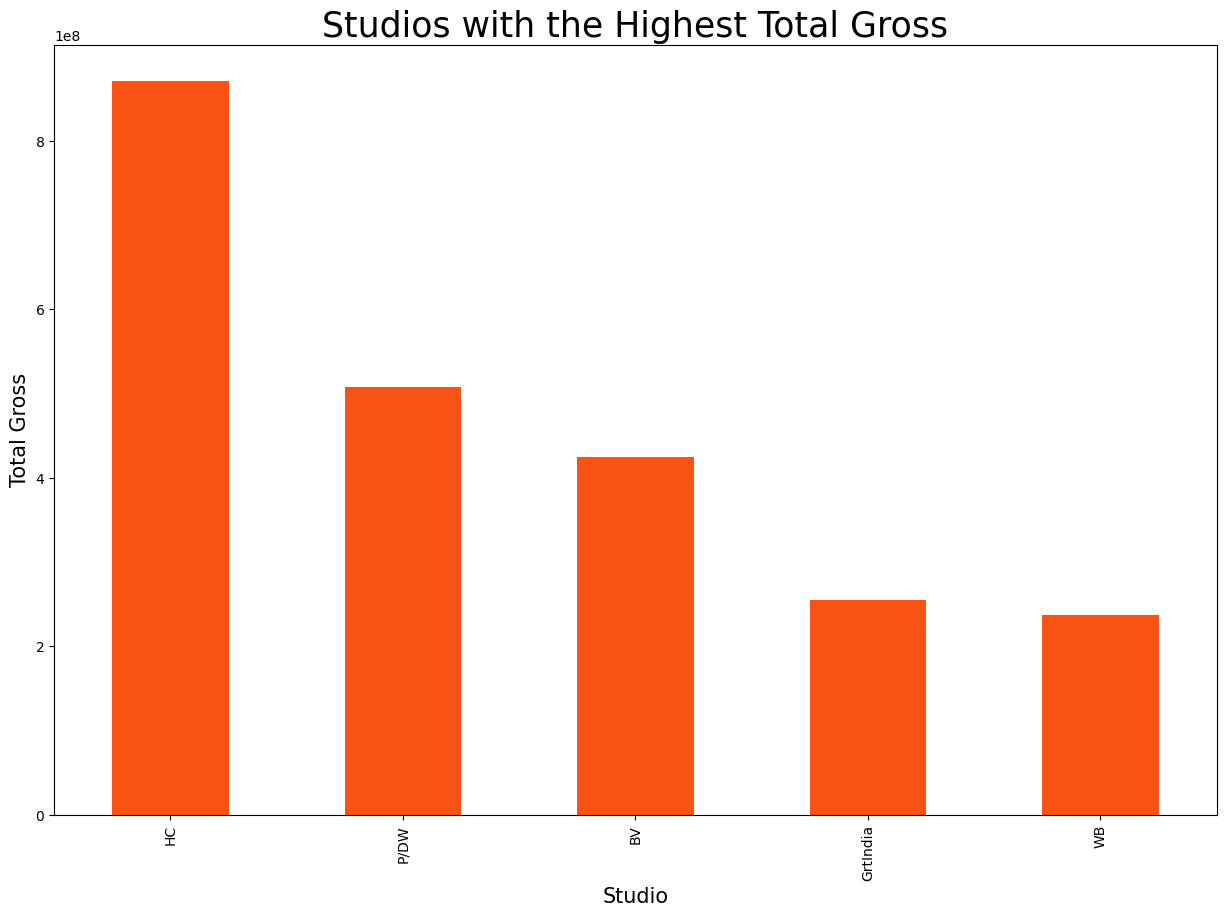

In [45]:
#Creating a bar graph of the studios with highest earnings
ax = studio_gross.plot(kind = 'bar',figsize = (15,10), color = '#f65314', width = 0.5)
ax.set_title('Studios with the Highest Total Gross', fontsize = 25)
ax.set_xlabel('Studio', fontsize = 15)
ax.set_ylabel('Total Gross', fontsize = 15)

Visualisation in a bar graph of the studios respective to their gross earnings, as described through cell 44

c:\Users\Alice\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


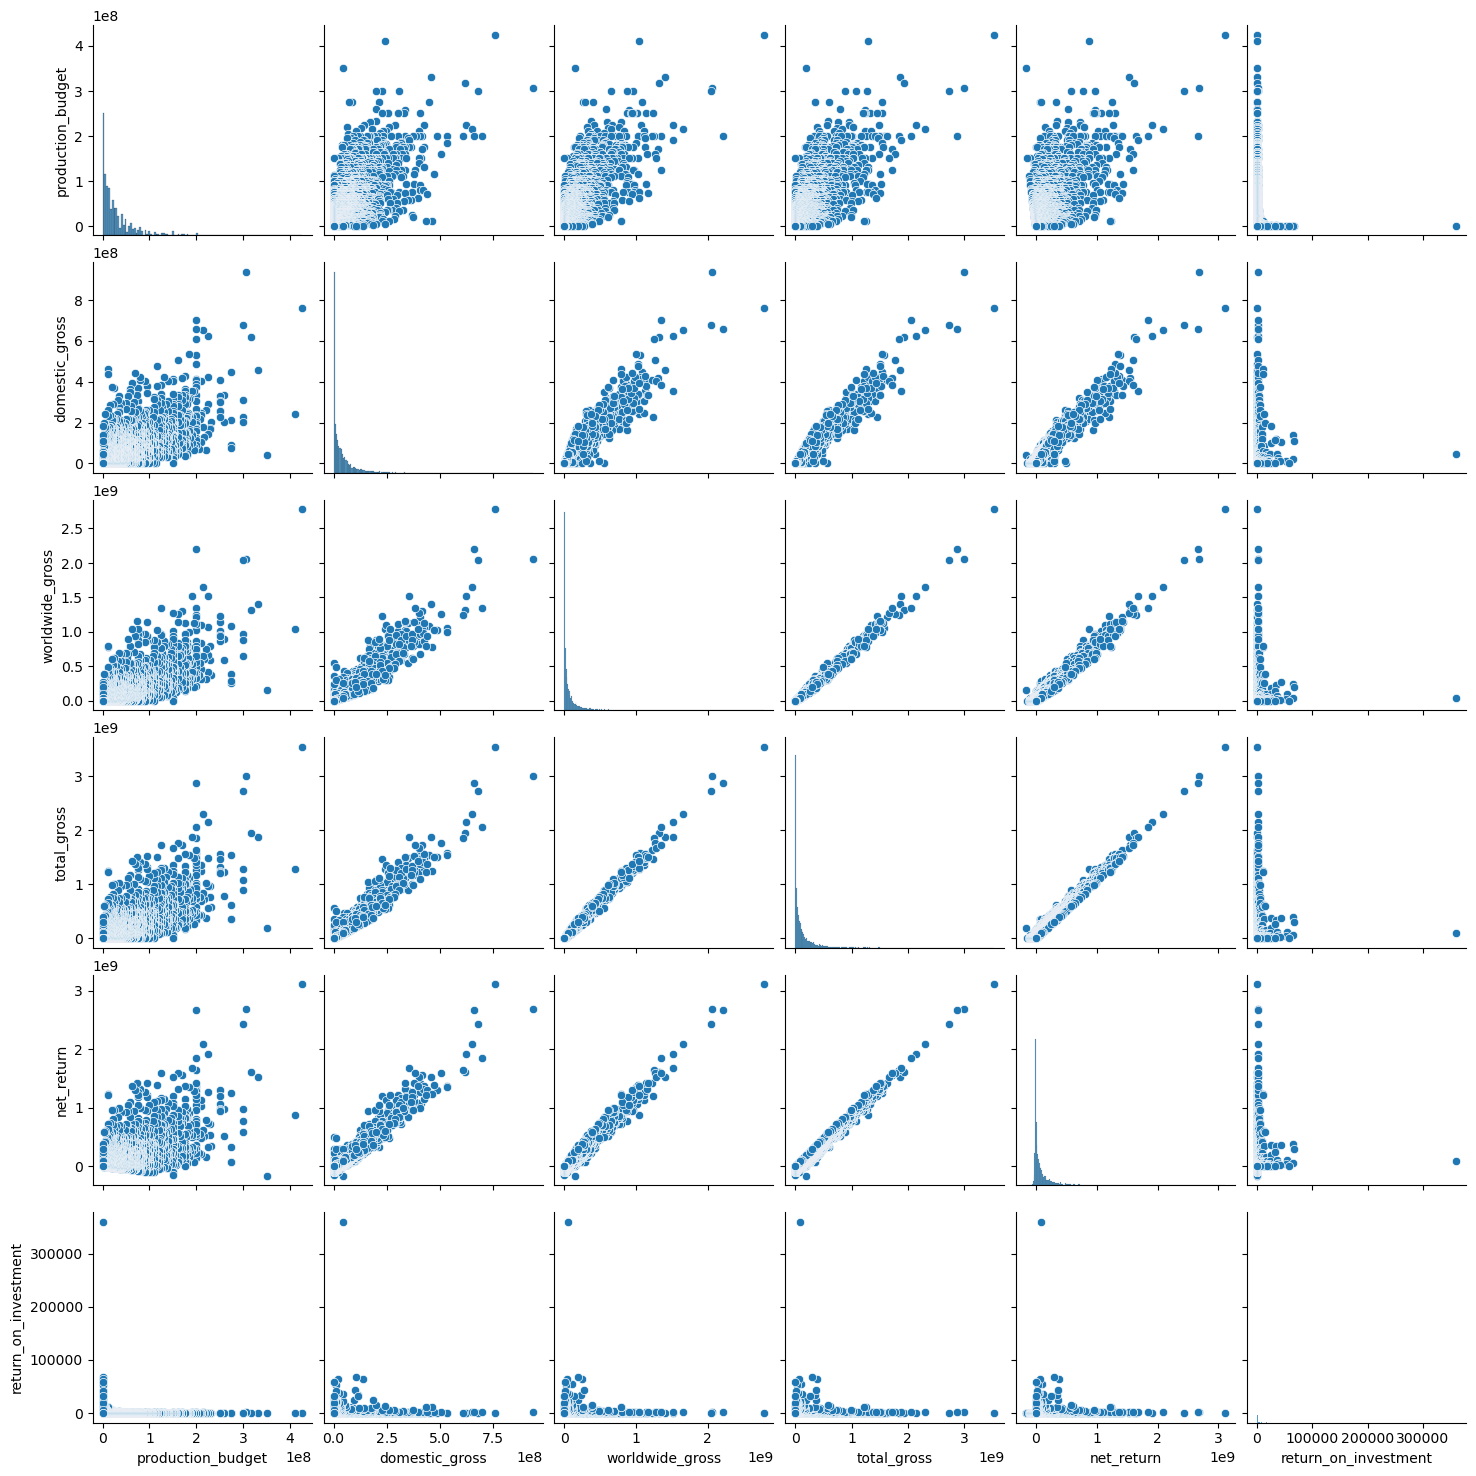

In [46]:
sns.pairplot(movie_budgets)

the production budget has a directly proportional relationship to both domestic and worldwide gross in the sense that any factors that may affect production affect worlwide and domestic gross in resemblance to their postive correlations.